In [ ]:
import matplotlib.pyplot as plt

class Environment:
    class Hunter:
        def __init__(self, height, width):
            self.height = height
            self.width = width

        def initialize_state(self):
            # state = np.random.rand(2)
            # environment = np.array([self.width, self.height])
            # state = state * environment
            random1 = (np.random.rand() * 2 - 1) / 2
            random2 = (np.random.rand() * 2 - 1) / 2
            random3 = (np.random.rand() * 2 - 1) / 2
            hunter_state1 = np.array([0, random3])
            hunter_state2 = np.array([0, (1 + random2) * self.height])
            hunter_state3 = np.array([0, (-1 + random3) * self.height])
            return hunter_state1, hunter_state2, hunter_state3
        
    class Prey:
        def __init__(self, height, width):
            self.height = height
            self.width = width
            self.moving_average = 0.0
            self.move_counts = 0

        def initialize_state(self):
            state = np.array([1, 0])
            environment = np.array([self.width, self.height / 2])
            state = state * environment
            return state

        def move_away_from_hunters(self, prey_state, hunter_state1, hunter_state2, hunter_state3):
            hunters_g = (hunter_state1 + hunter_state2 + hunter_state3) / 3
            g_to_prey_state_vector = prey_state - hunters_g
            g_to_prey_state_vector_norm = g_to_prey_state_vector / np.linalg.norm(g_to_prey_state_vector)
            new_prey_state = prey_state + g_to_prey_state_vector_norm * 0.3

            # new_prey_state = prey_state + np.array([0.3, 0])

            # new_prey_state = prey_state
            return new_prey_state
    
    def __init__(self):
        # self.done = False
        self.max_episode_steps = 10
        self.reward_for_no_match = -0.5
        self.reward_for_distance = -0.2
        self.reward_for_catch = 2
        self.reward_for_caging = 0.2
        # self.area_threshold = 0.05
        self.distance_threshold = 3.0
        self.prey = self.Prey(4,4)
        self.hunter = self.Hunter(2,2)
        
        self.hunter_state1 = None
        self.hunter_state2 = None
        self.hunter_state3 = None
        self.prey_state = None
        
        self.initialize_state()
        
    def initialize_state(self):
        self.hunter_state1, self.hunter_state2, self.hunter_state3 = self.hunter.initialize_state()
        self.prey_state = self.prey.initialize_state()
        
        return self.hunter_state1, self.hunter_state2, self.hunter_state3, self.prey_state

    def sigmoid(self, x):
        return np.exp(x) / (np.exp(x) + 1)
    
    def step(self, action1, action2, action3):
        done = False

        original_hunter1_vector_from_prey = self.hunter_state1 - self.prey_state
        original_hunter2_vector_from_prey = self.hunter_state2 - self.prey_state
        original_hunter3_vector_from_prey = self.hunter_state3 - self.prey_state

        original_hunter1_distance_from_prey = np.linalg.norm(original_hunter1_vector_from_prey)
        original_hunter2_distance_from_prey = np.linalg.norm(original_hunter2_vector_from_prey)
        original_hunter3_distance_from_prey = np.linalg.norm(original_hunter3_vector_from_prey)

        self.prey_state = self.prey.move_away_from_hunters(self.prey_state, self.hunter_state1, self.hunter_state2, self.hunter_state3)
        action1 = action1 / np.linalg.norm(action1)
        action2 = action2 / np.linalg.norm(action2)
        action3 = action3 / np.linalg.norm(action3)

        self.hunter_state1 = self.hunter_state1 + action1
        self.hunter_state2 = self.hunter_state2 + action2
        self.hunter_state3 = self.hunter_state3 + action3
        
        # self.hunter_state1 = self.hunter_state1 + np.array([self.sigmoid(action1[0]) * np.cos(2 * np.pi * self.sigmoid(action1[1])), self.sigmoid(action1[0]) * np.sin(2 * np.pi * self.sigmoid(action1[1]))])
        # self.hunter_state2 = self.hunter_state2 + np.array([self.sigmoid(action2[0]) * np.cos(2 * np.pi * self.sigmoid(action2[1])), self.sigmoid(action2[0]) * np.sin(2 * np.pi * self.sigmoid(action2[1]))])
        # self.hunter_state3 = self.hunter_state3 + np.array([self.sigmoid(action3[0]) * np.cos(2 * np.pi * self.sigmoid(action3[1])), self.sigmoid(action3[0]) * np.sin(2 * np.pi * self.sigmoid(action3[1]))])
        # self.hunter_state1 = self.hunter_state1 + np.array([self.sigmoid(action1[0]) * np.cos(self.sigmoid(action1[1])), self.sigmoid(action1[0]) * np.sin(self.sigmoid(action1[1]))])
        # self.hunter_state2 = self.hunter_state2 + np.array([self.sigmoid(action2[0]) * np.cos(self.sigmoid(action2[1])), self.sigmoid(action2[0]) * np.sin(self.sigmoid(action2[1]))])
        # self.hunter_state3 = self.hunter_state3 + np.array([self.sigmoid(action3[0]) * np.cos(self.sigmoid(action3[1])), self.sigmoid(action3[0]) * np.sin(self.sigmoid(action3[1]))])

        hunter2_vector_from_hunter1 = self.hunter_state2 - self.hunter_state1
        hunter3_vector_from_hunter1 = self.hunter_state3 - self.hunter_state1
        
        hunter1_vector_from_prey = self.hunter_state1 - self.prey_state
        hunter2_vector_from_prey = self.hunter_state2 - self.prey_state
        hunter3_vector_from_prey = self.hunter_state3 - self.prey_state

        hunter1_distance_from_prey = np.linalg.norm(hunter1_vector_from_prey)
        hunter2_distance_from_prey = np.linalg.norm(hunter2_vector_from_prey)
        hunter3_distance_from_prey = np.linalg.norm(hunter3_vector_from_prey)
        
        cross_h1_h2_h3 = np.cross(hunter2_vector_from_hunter1, hunter3_vector_from_hunter1)
        cross_p_h1_h2 = np.cross(hunter1_vector_from_prey, hunter2_vector_from_prey)
        cross_p_h2_h3 = np.cross(hunter2_vector_from_prey, hunter3_vector_from_prey)
        cross_p_h3_h1 = np.cross(hunter3_vector_from_prey, hunter1_vector_from_prey)

        area_h1_h2_h3 = abs(cross_h1_h2_h3) / 2
        area_p_h1_h2 = abs(cross_p_h1_h2) / 2
        area_p_h2_h3 = abs(cross_p_h2_h3) / 2
        area_p_h3_h1 = abs(cross_p_h3_h1) / 2 

        sum_area_of_ps = area_p_h1_h2 + area_p_h2_h3 + area_p_h3_h1

        # print(self.prey_state, self.hunter_state1, self.hunter_state2, self.hunter_state3)
        # plt.plot(self.prey_state[0], self.prey_state[1], 'r', marker='o')
        # plt.plot(self.hunter_state1[0], self.hunter_state1[1], 'b',marker='o')
        # plt.plot(self.hunter_state2[0], self.hunter_state2[1], 'b', marker='o')
        # plt.plot(self.hunter_state3[0], self.hunter_state3[1], 'b', marker='o')
        # plt.show()
        # print(cross_h1_h2_h3, cross_p_h1_h2, cross_p_h2_h3, cross_p_h3_h1)

        # reward1 = self.reward_for_no_match
        # reward2 = self.reward_for_no_match
        # reward3 = self.reward_for_no_match

        # if (hunter1_distance_from_prey < self.distance_threshold):
        #   reward1 = self.reward_for_distance

        # if (hunter2_distance_from_prey < self.distance_threshold):
        #   reward2 = self.reward_for_distance

        # if (hunter3_distance_from_prey < self.distance_threshold):
        #   reward3 = self.reward_for_distance

        reward1 = -0.3 - (hunter1_distance_from_prey - original_hunter1_distance_from_prey) * 0.2 
        reward2 = -0.3 - (hunter2_distance_from_prey - original_hunter2_distance_from_prey) * 0.2 
        reward3 = -0.3 - (hunter3_distance_from_prey - original_hunter3_distance_from_prey) * 0.2 

        # if (original_hunter1_distance_from_prey > hunter1_distance_from_prey):
        #   reward1 = -0.2
        # else:
        #   reward1 = -0.5

        # if (original_hunter2_distance_from_prey > hunter2_distance_from_prey):
        #   reward2 = -0.2
        # else:
        #   reward2 = -0.5
        
        # if (original_hunter3_distance_from_prey > hunter3_distance_from_prey):
        #   reward3 = -0.2
        # else:
        #   reward3 = -0.5

        # if (sum_area_of_ps == area_h1_h2_h3):
        #   reward1 = reward1 / 2
        #   reward2 = reward2 / 2
        #   reward3 = reward3 / 2
        #   print('Close!', reward1, reward2, reward3)

        if (hunter1_distance_from_prey < self.distance_threshold and hunter2_distance_from_prey < self.distance_threshold and hunter2_distance_from_prey < self.distance_threshold and sum_area_of_ps == area_h1_h2_h3):
          reward1 = self.reward_for_catch
          reward2 = self.reward_for_catch
          reward3 = self.reward_for_catch
          print('Caught!')
          done = True


        # if (hunter1_distance_from_prey < self.distance_threshold or hunter2_distance_from_prey < self.distance_threshold or hunter3_distance_from_prey < self.distance_threshold):
        #   reward = self.reward2
        #   if ((hunter1_distance_from_prey < self.distance_threshold and hunter2_distance_from_prey < self.distance_threshold) or (hunter2_distance_from_prey < self.distance_threshold and hunter3_distance_from_prey < self.distance_threshold) or (hunter3_distance_from_prey < self.distance_threshold and hunter1_distance_from_prey < self.distance_threshold)):
        #     reward = self.reward3
        #     if (hunter1_distance_from_prey < self.distance_threshold and hunter2_distance_from_prey < self.distance_threshold and hunter2_distance_from_prey < self.distance_threshold):
        #       reward = self.reward4
        #       if (sum_area_of_ps == area_h1_h2_h3):
        #         reward = self.reward5
        #         done = True
 
        # print(reward, hunter1_distance_from_prey, hunter2_distance_from_prey, hunter3_distance_from_prey)

        # if (sum_area_of_ps == area_h1_h2_h3):
        #     if(area_h1_h2_h3 < self.area_threshold):
        #       reward = self.reward1
        #       done = True
        #     else:
        #       reward = self.reward2            
        # else:
        #     reward = self.reward3
            # print(sum_area_of_ps == area_h1_h2_h3, sum_area_of_ps, area_h1_h2_h3)
        return self.prey_state, self.hunter_state1, self.hunter_state2, self.hunter_state3, reward1, reward2, reward3, done

In [ ]:
# prey_state = np.array([2.455675, 1.122334])
# hunter_state1 = np.array([0.00123, 0.0000312])
# hunter_state2 = np.array([3.99878, 0.00122])
# hunter_state3 = np.array([4.22342, 3.556674])
        
# hunter2_vector_from_hunter1 = hunter_state2 - hunter_state1
# hunter3_vector_from_hunter1 = hunter_state3 - hunter_state1
        
# hunter1_vector_from_prey = hunter_state1 - prey_state
# hunter2_vector_from_prey = hunter_state2 - prey_state
# hunter3_vector_from_prey = hunter_state3 - prey_state
        
# cross_h1_h2_h3 = np.cross(hunter2_vector_from_hunter1, hunter3_vector_from_hunter1)
# cross_p_h1_h2 = np.cross(hunter1_vector_from_prey, hunter2_vector_from_prey)
# cross_p_h2_h3 = np.cross(hunter2_vector_from_prey, hunter3_vector_from_prey)
# cross_p_h3_h1 = np.cross(hunter3_vector_from_prey, hunter1_vector_from_prey)

# area_h1_h2_h3 = np.linalg.norm(cross_h1_h2_h3) /2
# area_p_h1_h2 = np.linalg.norm(cross_p_h1_h2) /2
# area_p_h2_h3 = np.linalg.norm(cross_p_h2_h3) /2
# area_p_h3_h1 = np.linalg.norm(cross_p_h3_h1) /2

# print(area_h1_h2_h3, 
#       area_p_h1_h2, 
#       area_p_h2_h3,
#       area_p_h3_h1)

# sum_area_of_ps = area_p_h1_h2 + area_p_h2_h3 + area_p_h3_h1
# sum_area_of_ps == area_h1_h2_h3

In [ ]:
from torch import nn

def reparameterize(means, log_stds):
    stds = log_stds.exp()
    noises = torch.randn_like(means)
    us = means + noises * stds
    actions = torch.tanh(us)
    log_pis = calculate_log_pi(log_stds, noises, actions)
    return actions, log_pis

def calculate_log_pi(log_stds, noises, actions):
    gaussian_log_probs = (-0.5 * noises.pow(2) - log_stds).sum(dim=-1, keepdim=True) - 0.5* math.log(2 * math.pi) * log_stds.size(-1)
    log_pis = gaussian_log_probs - torch.log(1 - actions.pow(2) + 1e-6).sum(dim=-1, keepdim=True)
    return log_pis

class SACActor(nn.Module):
    def __init__(self, state_shape, action_shape):
        super().__init__()
        
        self.net=nn.Sequential(
            nn.Linear(state_shape[0] * state_shape[1], 512),
            nn.ReLU(inplace=True),
            nn.Linear(512,512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 2 * action_shape[0])
        )
        
    def forward(self, states):
        # print('Actor forwarding')
        states = torch.reshape(states, (-1,6))
        states = torch.flatten(states)
        # print('net:')
        # print(self.net(states))
        # print('actor net done')
        net = torch.tanh(self.net(states).chunk(2, dim=-1)[0])
        # print(net)
        # print(net.shape)
        return net
        # return self.net(states)
    
    def sample(self, states):
        # print(states.shape)
        states = torch.reshape(states, (-1,6))
        # print(states.shape)
        # means, log_stds = self.net(states).chunk(2,dim=-1)
        # print(self.net(states))
        # means, log_stds = self.net(states)
        means, log_stds = self.net(states).chunk(2, dim=-1)
        # print('done means')
        return reparameterize(means, log_stds.clamp_(-20,2))
    
class SACCritic(nn.Module):
    def __init__(self, state_shape, action_shape):
        super().__init__()
        
        self.net1 = nn.Sequential(
            nn.Linear((state_shape[0] + 1) * state_shape[1], 512),
            nn.ReLU(inplace=True),
            nn.Linear(512,256),
            nn.ReLU(inplace=True),
            nn.Linear(256,256),
            nn.ReLU(inplace=True),
            nn.Linear(256,256),
            nn.ReLU(inplace=True),
            nn.Linear(256,1)
        )
        
        self.net2 = nn.Sequential(
            nn.Linear((state_shape[0] + 1) * state_shape[1], 512),
            nn.ReLU(inplace=True),
            nn.Linear(512,256),
            nn.ReLU(inplace=True),
            nn.Linear(256,256),
            nn.ReLU(inplace=True),
            nn.Linear(256,256),
            nn.ReLU(inplace=True),
            nn.Linear(256,1)
        )
        
    def forward(self, states, actions):
        actions = torch.reshape(actions, (512,1,2))
        # print(actions)
        # print(states)
        x = torch.cat([states, actions], 1)
        # print(x)
        x = torch.reshape(x, (-1,8))
        # x = torch.flatten(x)
        # print(x)
        net1, net2 = self.net1(x), self.net2(x)
        net1, net2 = torch.reshape(net1, (-1,)), torch.reshape(net2, (-1,))
        # print('Critic net done')
        return net1, net2

In [ ]:
class ReplayBuffer:
    def __init__(self, buffer_size, state_shape, action_shape, device):
        self._p = 0
        self._n = 0
        self.buffer_size = buffer_size
        
        self.states = torch.empty((buffer_size, *state_shape), dtype=torch.float, device=device)
        self.actions = torch.empty((buffer_size, *action_shape), dtype=torch.float, device=device)
        self.rewards = torch.empty((buffer_size, 1), dtype=torch.float, device=device)
        self.dones = torch.empty((buffer_size, 1), dtype=torch.float, device=device)
        self.next_states = torch.empty((buffer_size, *state_shape), dtype=torch.float, device=device)
        
    def append(self, state, action, reward, done, next_state):
        # print(self.states[0], state)
        self.states[self._p].copy_(torch.from_numpy(state))
        self.actions[self._p].copy_(torch.from_numpy(action))
        self.rewards[self._p] = float(reward)
        self.dones[self._p] = float(done)
        self.next_states[self._p].copy_(torch.from_numpy(next_state))
        
        self._p = (self._p + 1) % self.buffer_size
        self._n = min(self._n + 1, self.buffer_size)
        
    def sample(self, batch_size):
        idxes = np.random.randint(low=0, high=self._n, size=batch_size)
        return(
            self.states[idxes],
            self.actions[idxes],
            self.rewards[idxes],
            self.dones[idxes],
            self.next_states[idxes]
        )

In [ ]:
from abc import ABC, abstractmethod

class Algorithm(ABC):
    def explore(self, state, actor):
        state = torch.tensor(state, dtype=torch.float, device=self.device).unsqueeze_(0)
        with torch.no_grad():
            action, log_pi = actor.sample(state)
        action = action.cpu().numpy()[0]
        action = action / np.linalg.norm(action)
        return action, log_pi.item()
    
    def exploit(self, state, actor):
        state = torch.tensor(state, dtype=torch.float, device=self.device).unsqueeze_(0)
        # print('exploit')
        # print(state)
        with torch.no_grad():
            action = actor(state)
        action = action.cpu().numpy()
        action = action / np.linalg.norm(action)
        return action

In [ ]:
import math, torch
import numpy as np

env = Environment()

class SAC(Algorithm):
    def __init__(self, state_shape, action_shape, device=torch.device('cuda'), seed=0, batch_size=512, gamma=0.99, lr_actor=3e-4, lr_critic=3e-4, replay_size=10**4, start_steps=2 * 10**5, tau=5e-3, alpha=0.2, reward_scale=1.0):
        super().__init__()
        
        np.random.seed(seed)
        torch.manual_seed(seed)
        
        self.buffer1 = ReplayBuffer(
            buffer_size=replay_size,
            state_shape=state_shape,
            action_shape=action_shape,
            device=device
        )
        
        self.buffer2 = ReplayBuffer(
            buffer_size=replay_size,
            state_shape=state_shape,
            action_shape=action_shape,
            device=device
        )
        
        self.buffer3 = ReplayBuffer(
            buffer_size=replay_size,
            state_shape=state_shape,
            action_shape=action_shape,
            device=device
        )
        
        self.actor1 = SACActor(
            state_shape=state_shape,
            action_shape=action_shape
        ).to(device)
        
        self.critic1 = SACCritic(
            state_shape=state_shape,
            action_shape=action_shape
        ).to(device)
        
        self.critic_target1 = SACCritic(
            state_shape=state_shape,
            action_shape=action_shape
        ).to(device).eval()

        self.actor2 = SACActor(
            state_shape=state_shape,
            action_shape=action_shape
        ).to(device)
        
        self.critic2 = SACCritic(
            state_shape=state_shape,
            action_shape=action_shape
        ).to(device)
        
        self.critic_target2 = SACCritic(
            state_shape=state_shape,
            action_shape=action_shape
        ).to(device).eval()

        self.actor3 = SACActor(
            state_shape=state_shape,
            action_shape=action_shape
        ).to(device)
        
        self.critic3 = SACCritic(
            state_shape=state_shape,
            action_shape=action_shape
        ).to(device)
        
        self.critic_target3 = SACCritic(
            state_shape=state_shape,
            action_shape=action_shape
        ).to(device).eval()
        
        self.critic_target1.load_state_dict(self.critic1.state_dict())
        for param in self.critic_target1.parameters():
            param.requires_grad = False
        
        self.critic_target2.load_state_dict(self.critic2.state_dict())
        for param in self.critic_target2.parameters():
            param.requires_grad = False

        self.critic_target3.load_state_dict(self.critic3.state_dict())
        for param in self.critic_target3.parameters():
            param.requires_grad = False
        
        self.optim_actor1 = torch.optim.Adam(self.actor1.parameters(), lr=lr_actor)
        self.optim_actor2 = torch.optim.Adam(self.actor2.parameters(), lr=lr_actor)
        self.optim_actor3 = torch.optim.Adam(self.actor3.parameters(), lr=lr_actor)
        
        self.optim_critic1 = torch.optim.Adam(self.critic1.parameters(), lr=lr_critic)
        self.optim_critic2 = torch.optim.Adam(self.critic2.parameters(), lr=lr_critic)
        self.optim_critic3 = torch.optim.Adam(self.critic3.parameters(), lr=lr_critic)
        
        self.learning_steps = 0
        self.batch_size = batch_size
        self.device = device
        self.gamma = gamma
        self.start_steps = start_steps
        self.tau = tau
        self.alpha = alpha
        self.reward_scale = reward_scale
        
    def is_update(self, steps):
        return steps >= max(self.start_steps, self.batch_size)
    
    def step(self, env, hunter_state1, hunter_state2, hunter_state3, t, steps):
        t += 1

        original_prey_state = env.prey_state
        
        relative_hunter_state1_from_prey = hunter_state1 - original_prey_state
        relative_hunter_state2_from_prey = hunter_state2 - original_prey_state
        relative_hunter_state3_from_prey = hunter_state3 - original_prey_state

        relative_hunter_state1_from_hunter2 = hunter_state1 - hunter_state2
        relative_hunter_state1_from_hunter3 = hunter_state1 - hunter_state3

        relative_hunter_state2_from_hunter3 = hunter_state2 - hunter_state3
        relative_hunter_state2_from_hunter1 = hunter_state2 - hunter_state1

        relative_hunter_state3_from_hunter1 = hunter_state3 - hunter_state1
        relative_hunter_state3_from_hunter2 = hunter_state3 - hunter_state2

        hunter_state1_matrix = np.stack([relative_hunter_state1_from_prey, relative_hunter_state1_from_hunter2, relative_hunter_state1_from_hunter3])
        hunter_state2_matrix = np.stack([relative_hunter_state2_from_prey, relative_hunter_state2_from_hunter3, relative_hunter_state2_from_hunter1])
        hunter_state3_matrix = np.stack([relative_hunter_state3_from_prey, relative_hunter_state3_from_hunter1, relative_hunter_state3_from_hunter2])

        e = np.random.rand()
        
        if steps <= self.start_steps or e > 0.5:
            if steps >= self.start_steps and e > 0.5:
              print(e)
            # r = np.random.randn(3)
            # theta = 2 * np.pi * np.random.randn(3)
            # action = np.array([r * np.cos(theta), r * np.sin(theta)])
            # action = action.T
            action = np.random.rand(3,2)
            norm = np.linalg.norm(action, axis=1)
            action = action / norm[:,None]
            action_1 = action[0] 
            action_2 = action[1] 
            action_3 = action[2] 
        else:
            action_1,_ = self.explore(hunter_state1_matrix, self.actor1)
            action_2,_ = self.explore(hunter_state2_matrix, self.actor2)
            action_3,_ = self.explore(hunter_state3_matrix, self.actor3)

        # action = np.random.rand(3,2)
        # norm = np.linalg.norm(action, axis=1)
        # action = action / norm[:,None]
        # action_1 = action[0] 
        # action_2 = action[1] 
        # action_3 = action[2]

        next_prey_state, next_hunter_state1, next_hunter_state2, next_hunter_state3, reward1, reward2, reward3, done = env.step(action_1, action_2, action_3)
        
        relative_next_hunter_state1_from_prey = next_hunter_state1 - next_prey_state
        relative_next_hunter_state2_from_prey = next_hunter_state2 - next_prey_state
        relative_next_hunter_state3_from_prey = next_hunter_state3 - next_prey_state

        relative_next_hunter_state1_from_hunter2 = next_hunter_state1 - next_hunter_state2
        relative_next_hunter_state1_from_hunter3 = next_hunter_state1 - next_hunter_state3

        relative_next_hunter_state2_from_hunter3 = next_hunter_state2 - next_hunter_state3
        relative_next_hunter_state2_from_hunter1 = next_hunter_state2 - next_hunter_state1

        relative_next_hunter_state3_from_hunter1 = next_hunter_state3 - next_hunter_state1
        relative_next_hunter_state3_from_hunter2 = next_hunter_state3 - next_hunter_state2

        next_hunter_state1_matrix = np.stack([relative_next_hunter_state1_from_prey, relative_next_hunter_state1_from_hunter2, relative_next_hunter_state1_from_hunter3])
        next_hunter_state2_matrix = np.stack([relative_next_hunter_state2_from_prey, relative_next_hunter_state2_from_hunter3, relative_next_hunter_state2_from_hunter1])
        next_hunter_state3_matrix = np.stack([relative_next_hunter_state3_from_prey, relative_next_hunter_state3_from_hunter1, relative_next_hunter_state3_from_hunter2])

        if t == env.max_episode_steps:
            done_masked = False
        else:
            done_masked = done

        self.buffer1.append(hunter_state1_matrix, action_1, reward1, done_masked, next_hunter_state1_matrix)
        self.buffer2.append(hunter_state2_matrix, action_2, reward2, done_masked, next_hunter_state2_matrix)
        self.buffer3.append(hunter_state3_matrix, action_3, reward3, done_masked, next_hunter_state3_matrix)
        
        if done:
            t = 0
            next_hunter_state1, next_hunter_state2, next_hunter_state3, next_prey_state = env.initialize_state()
        
        return next_hunter_state1, next_hunter_state2, next_hunter_state3, next_prey_state, t
    
    def update(self):
        self.learning_steps += 1
        
        relative_hunter_states1_matrix, actions1, rewards1, dones1, relative_next_hunter_states1_matrix = self.buffer1.sample(self.batch_size)
        relative_hunter_states2_matrix, actions2, rewards2, dones2, relative_next_hunter_states2_matrix = self.buffer2.sample(self.batch_size)
        relative_hunter_states3_matrix, actions3, rewards3, dones3, relative_next_hunter_states3_matrix = self.buffer3.sample(self.batch_size)
        
        self.update_critic(relative_hunter_states1_matrix, actions1, rewards1, dones1, relative_next_hunter_states1_matrix, self.critic1, self.actor1, self.critic_target1, self.optim_critic1)
        self.update_critic(relative_hunter_states2_matrix, actions2, rewards2, dones2, relative_next_hunter_states2_matrix, self.critic2, self.actor2, self.critic_target2, self.optim_critic2)
        self.update_critic(relative_hunter_states3_matrix, actions3, rewards3, dones3, relative_next_hunter_states3_matrix, self.critic3, self.actor3, self.critic_target3, self.optim_critic3)

        self.update_actor(relative_hunter_states1_matrix, self.critic1, self.actor1, self.optim_actor1)
        self.update_actor(relative_hunter_states2_matrix, self.critic2, self.actor2, self.optim_actor2)
        self.update_actor(relative_hunter_states3_matrix, self.critic3, self.actor3, self.optim_actor3)
        self.update_target()
        
    def update_critic(self, states, actions, rewards, dones, next_states, critic, actor, critic_target, optim_critic):
        curr_qs1, curr_qs2 = critic(states, actions)
        # print('done critic')
        
        with torch.no_grad():
            next_actions, log_pis = actor.sample(next_states)
            # print('got samples')
            next_qs1, next_qs2 = critic_target(next_states, next_actions)
            next_qs = torch.min(next_qs1, next_qs2) - self.alpha * log_pis
        target_qs = rewards * self.reward_scale + (1.0 - dones) * self.gamma * next_qs
        
        loss_critic1 = (curr_qs1 - target_qs).pow_(2).mean()
        loss_critic2 = (curr_qs2 - target_qs).pow_(2).mean()
        
        optim_critic.zero_grad()
        (loss_critic1 + loss_critic2).backward(retain_graph=False)
        optim_critic.step()
    
    def update_actor(self, states, critic, actor, optim_actor):
        # print('Updating actor')
        actions, log_pis = actor.sample(states)
        qs1, qs2 = critic(states, actions)
        loss_actor = (self.alpha * log_pis - torch.min(qs1, qs2)).mean()
        
        optim_actor.zero_grad()
        loss_actor.backward(retain_graph=False)
        optim_actor.step()
        
    def update_target(self):
        for t, s in zip(self.critic_target1.parameters(), self.critic1.parameters()):
            t.data.mul_(1.0 - self.tau)
            t.data.add_(self.tau * s.data)

        for t, s in zip(self.critic_target2.parameters(), self.critic2.parameters()):
            t.data.mul_(1.0 - self.tau)
            t.data.add_(self.tau * s.data)
        
        for t, s in zip(self.critic_target3.parameters(), self.critic3.parameters()):
            t.data.mul_(1.0 - self.tau)
            t.data.add_(self.tau * s.data)

In [ ]:
import matplotlib.pyplot as plt
from time import time
from datetime import timedelta

class Trainer:
    def __init__(self, env, env_test, algo, seed=0, num_steps=10**6, eval_interval=10**4, num_eval_episodes=3):
        self.env = env
        self.env_test = env_test
        self.algo = algo
        
        # self.env.seed(seed)
        # self.env_test.seed(2**32 - seed)
        
        self.returns = {'step': [], 'return': []}
        
        self.num_steps = num_steps
        self.eval_interval = eval_interval
        self.num_eval_episodes = num_eval_episodes
        self.prey_state = env.prey_state
        
    def train(self):
        self.start_time = time()
        
        t = 0
        
        hunter_state1, hunter_state2, hunter_state3, prey_state = self.env.initialize_state()
        
        for steps in range(1, self.num_steps + 1):
          hunter_state1, hunter_state2, hunter_state3, prey_state, t = self.algo.step(self.env, hunter_state1, hunter_state2, hunter_state3, t, steps)
            
          if(self.algo.is_update(steps)):
              self.algo.update()
                
          if(steps % self.eval_interval == 0):
              self.evaluate(steps)

          if(steps % env.max_episode_steps == 0):
              hunter_state1, hunter_state2, hunter_state3, prey_state = self.env.initialize_state()

          if(steps % 1000 == 0):
              print(steps)
                
    def evaluate(self, steps):
        returns = []
        
        for _ in range(self.num_eval_episodes):
            hunter_state1, hunter_state2, hunter_state3, prey_state = self.env_test.initialize_state()
            done = False
            episode_return = 0.0
            i = 0
            print('New loop ')
            plt.plot(prey_state[0], prey_state[1], 'r', marker='$S$')
            plt.plot(hunter_state1[0], hunter_state1[1], 'dimgrey', marker='$S$')
            plt.plot(hunter_state2[0], hunter_state2[1], 'darkgrey', marker='$S$')
            plt.plot(hunter_state3[0], hunter_state3[1], 'lightgrey', marker='$S$')

            while(not done):
                original_prey_state = prey_state
                relative_hunter_state1_from_prey = hunter_state1 - original_prey_state
                relative_hunter_state2_from_prey = hunter_state2 - original_prey_state
                relative_hunter_state3_from_prey = hunter_state3 - original_prey_state

                relative_hunter_state1_from_hunter2 = hunter_state1 - hunter_state2
                relative_hunter_state1_from_hunter3 = hunter_state1 - hunter_state3

                relative_hunter_state2_from_hunter3 = hunter_state2 - hunter_state3
                relative_hunter_state2_from_hunter1 = hunter_state2 - hunter_state1

                relative_hunter_state3_from_hunter1 = hunter_state3 - hunter_state1
                relative_hunter_state3_from_hunter2 = hunter_state3 - hunter_state2

                hunter_state1_matrix = np.stack([relative_hunter_state1_from_prey, relative_hunter_state1_from_hunter2, relative_hunter_state1_from_hunter3])
                hunter_state2_matrix = np.stack([relative_hunter_state2_from_prey, relative_hunter_state2_from_hunter3, relative_hunter_state2_from_hunter1])
                hunter_state3_matrix = np.stack([relative_hunter_state3_from_prey, relative_hunter_state3_from_hunter1, relative_hunter_state3_from_hunter2])  
                
                if(i == env.max_episode_steps):
                  break
                i += 1
                action_hunter1 = self.algo.exploit(hunter_state1_matrix, self.algo.actor1)
                action_hunter2 = self.algo.exploit(hunter_state2_matrix, self.algo.actor2)
                action_hunter3 = self.algo.exploit(hunter_state3_matrix, self.algo.actor3)
                # action_hunter1,_ = self.algo.explore(hunter_state1_matrix, self.algo.actor1)
                # action_hunter2,_ = self.algo.explore(hunter_state2_matrix, self.algo.actor2)
                # action_hunter3,_ = self.algo.explore(hunter_state3_matrix, self.algo.actor3)
                prey_state, hunter_state1, hunter_state2, hunter_state3, reward1, reward2, reward3, done = self.env_test.step(action_hunter1, action_hunter2, action_hunter3)
                episode_return += reward1 + reward2 + reward3
                # print(reward1, reward2, reward3, done, hunter_state1, hunter_state2, hunter_state3, prey_state)                  

                plt.plot(prey_state[0], prey_state[1], 'r', marker='$' + str(i) + '$')
                plt.plot(hunter_state1[0], hunter_state1[1], 'dimgrey', marker='$' + str(i) + '$')
                plt.plot(hunter_state2[0], hunter_state2[1], 'darkgrey', marker='$' + str(i) + '$')
                plt.plot(hunter_state3[0], hunter_state3[1], 'lightgrey', marker='$' + str(i) + '$')

            plt.show()
            returns.append(episode_return)
        
        mean_return = np.mean(returns)
        self.returns['step'].append(steps)
        self.returns['return'].append(mean_return)
        
        print(f'Num steps: {steps:<6} '
             f'Return: {mean_return:<5.1f} '
             f'Time: {self.time}')
        
    def visualize(self):
        return
    
    def plot(self):
        fig = plt.figure(figsize=(8,6))
        plt.plot(self.returns['step'], self.returns['return'])
        plt.xlabel('Steps', fontsize=24)
        plt.ylabel('Return', fontsize=24)
        plt.tick_params(labelsize=18)
        plt.tight_layout()

    def time(self):
      return str(timedelta(seconds=int(time() - self.start_time)))

In [ ]:
SEED = 0
REWARD_SCALE = 1.0
NUM_STEPS =4 * 10 ** 5
EVAL_INTERVAL = 10 ** 4

algo = SAC(
    state_shape=(3,2),
    action_shape=(2,),
    # seed=SEED,
    reward_scale=REWARD_SCALE
)

trainer = Trainer(
    env=Environment(),
    env_test=Environment(),
    algo=algo,
    # seed=SEED,
    num_steps=NUM_STEPS,
    eval_interval=EVAL_INTERVAL
)

1000
2000
3000
4000
5000
6000
7000
8000
9000
New loop 


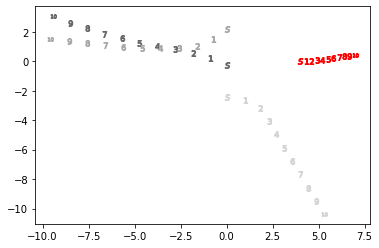

New loop 


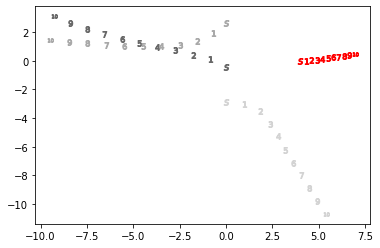

New loop 


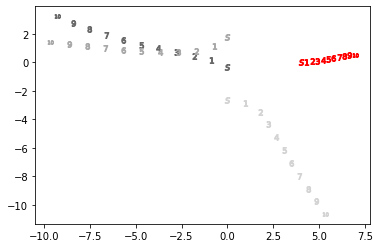

Num steps: 10000  Return: -15.2 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7fc7302dbb00>>
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
New loop 


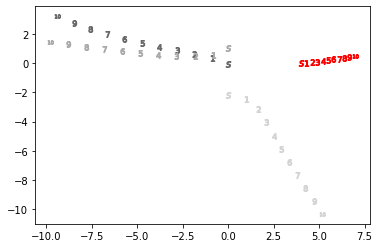

New loop 


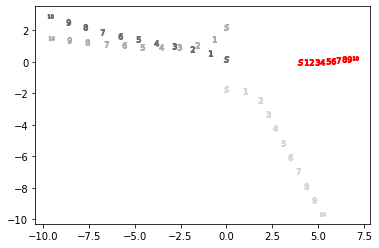

New loop 


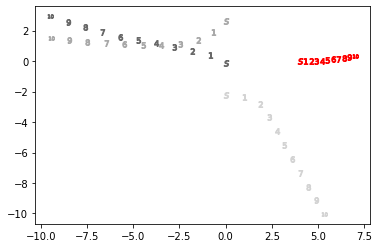

Num steps: 20000  Return: -15.2 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7fc7302dbb00>>
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
New loop 


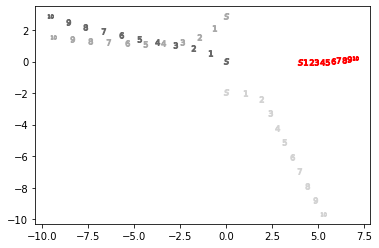

New loop 


New loop 


Num steps: 30000  Return: -15.0 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7fc7302dbb00>>
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
New loop 


New loop 


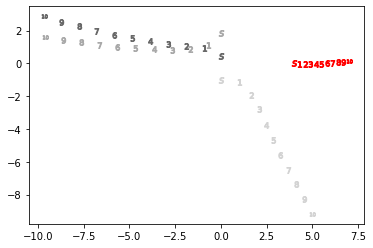

New loop 


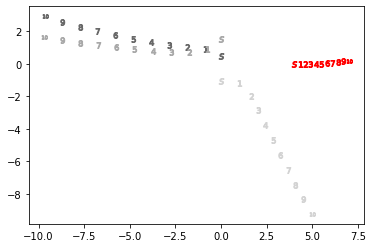

Num steps: 40000  Return: -15.1 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7fc7302dbb00>>
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
New loop 


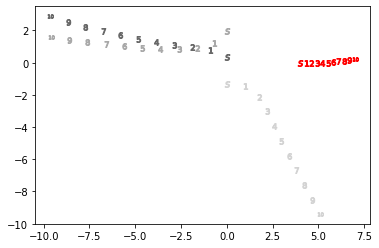

New loop 


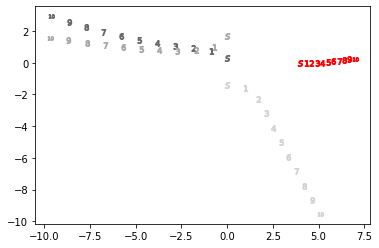

New loop 


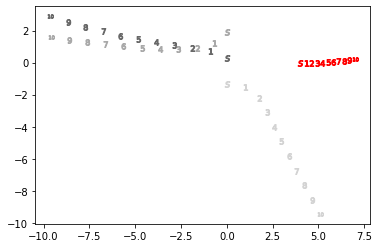

Num steps: 50000  Return: -15.1 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7fc7302dbb00>>
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
New loop 


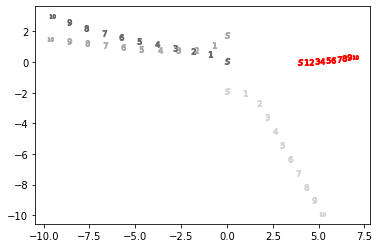

New loop 


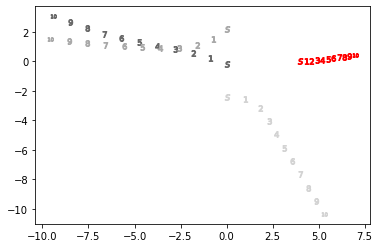

New loop 


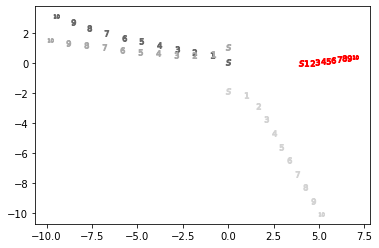

Num steps: 60000  Return: -15.2 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7fc7302dbb00>>
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
New loop 


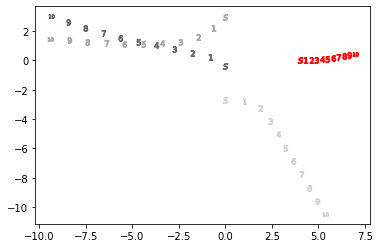

New loop 


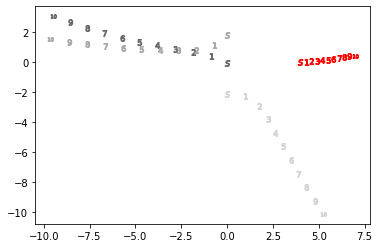

New loop 


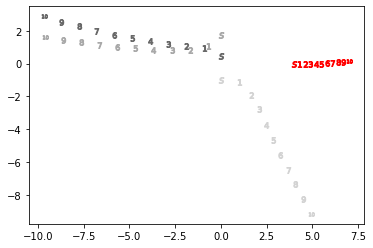

Num steps: 70000  Return: -15.1 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7fc7302dbb00>>
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
New loop 


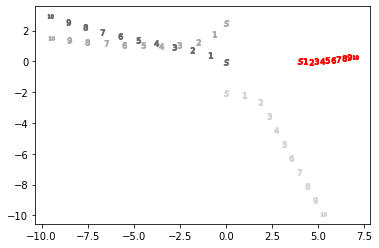

New loop 


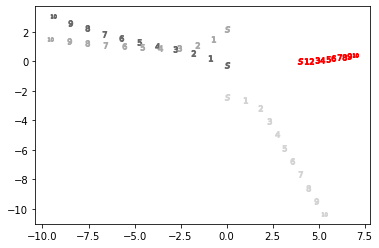

New loop 


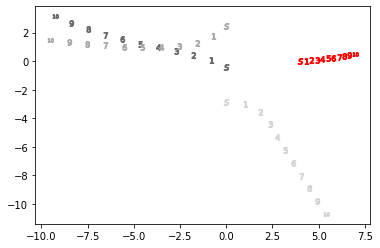

Num steps: 80000  Return: -15.1 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7fc7302dbb00>>
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
New loop 


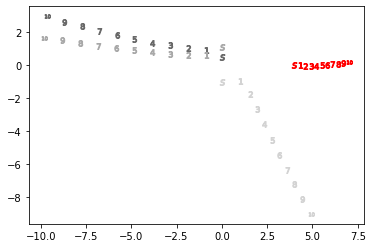

New loop 


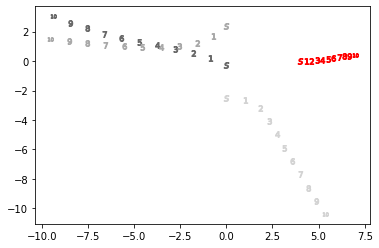

New loop 


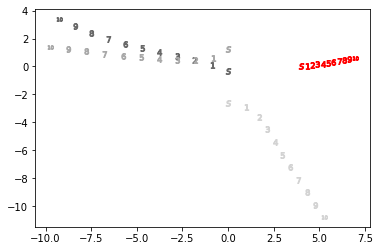

Num steps: 90000  Return: -15.2 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7fc7302dbb00>>
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
New loop 


New loop 


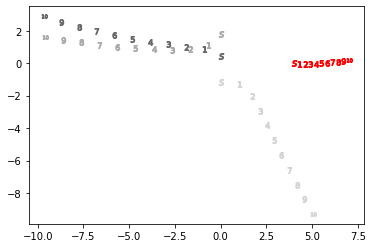

New loop 


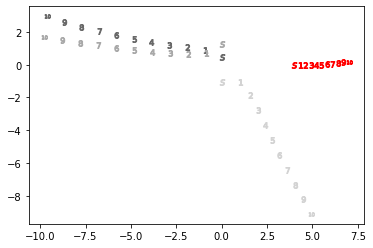

Num steps: 100000 Return: -15.2 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7fc7302dbb00>>
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
New loop 


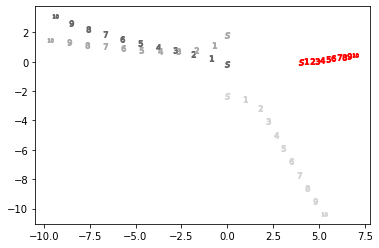

New loop 


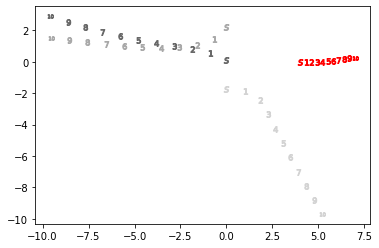

New loop 


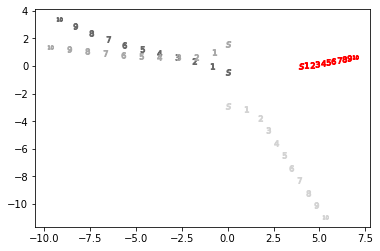

Num steps: 110000 Return: -15.2 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7fc7302dbb00>>
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
New loop 


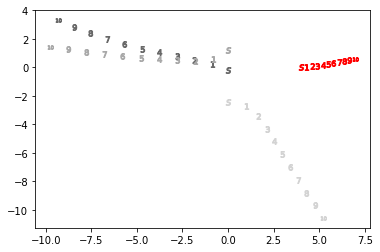

New loop 


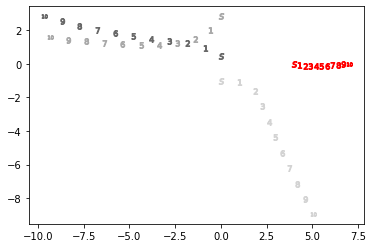

New loop 


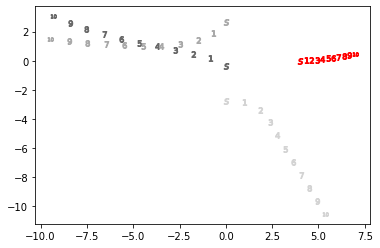

Num steps: 120000 Return: -15.1 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7fc7302dbb00>>
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
New loop 


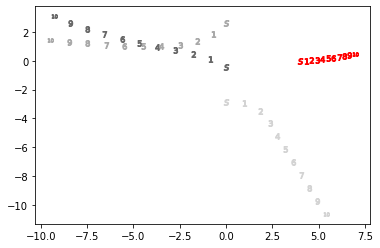

New loop 


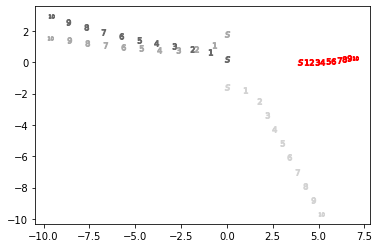

New loop 


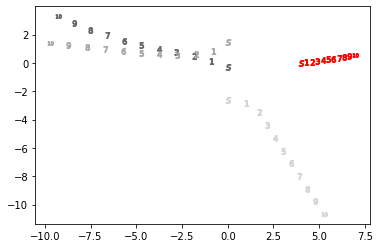

Num steps: 130000 Return: -15.2 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7fc7302dbb00>>
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
New loop 


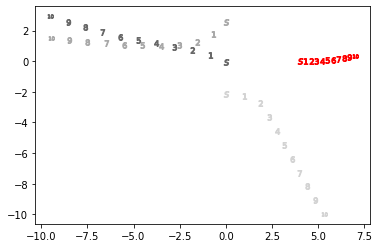

New loop 


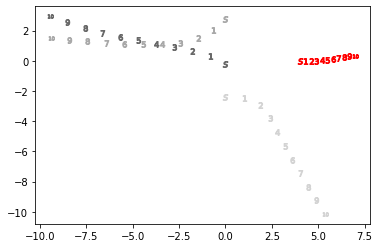

New loop 


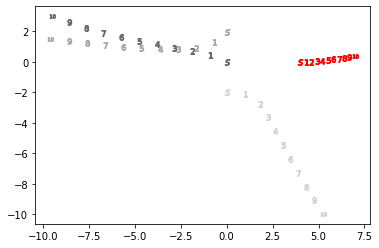

Num steps: 140000 Return: -15.1 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7fc7302dbb00>>
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
New loop 


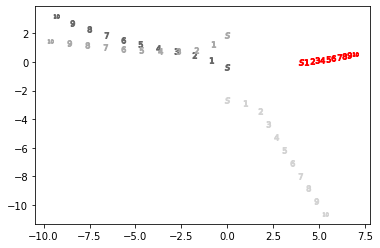

New loop 


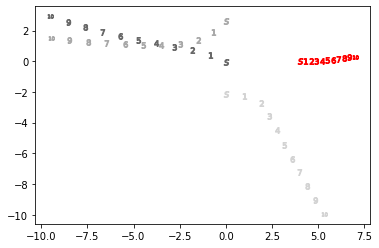

New loop 


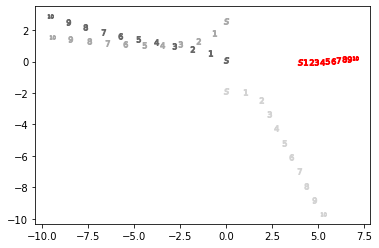

Num steps: 150000 Return: -15.1 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7fc7302dbb00>>
150000
151000
152000
153000
154000
155000
156000
157000
158000
159000
New loop 


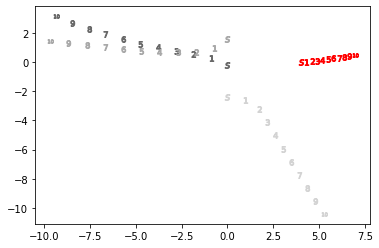

New loop 


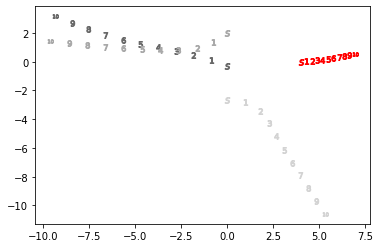

New loop 


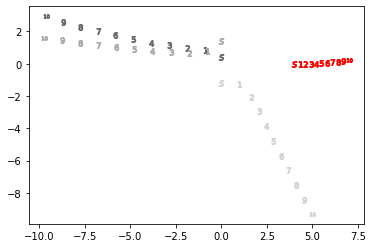

Num steps: 160000 Return: -15.2 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7fc7302dbb00>>
160000
161000
162000
163000
164000
165000
166000
167000
168000
169000
New loop 


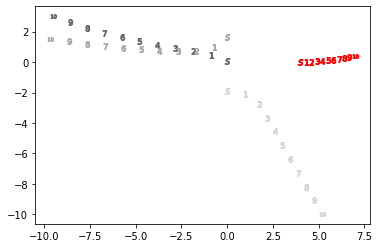

New loop 


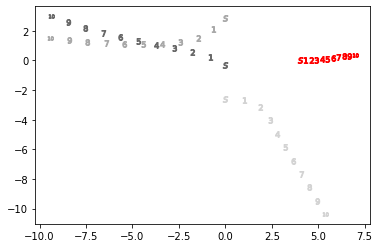

New loop 


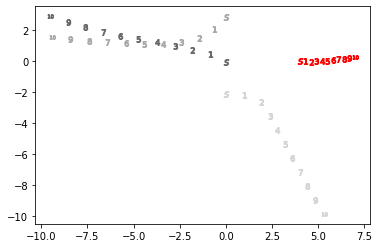

Num steps: 170000 Return: -15.1 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7fc7302dbb00>>
170000
171000
172000
173000
174000
175000
176000
177000
178000
179000
New loop 


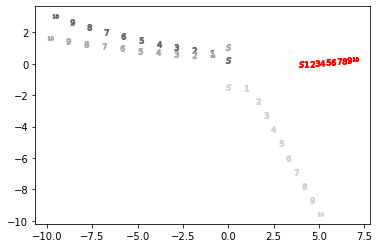

New loop 


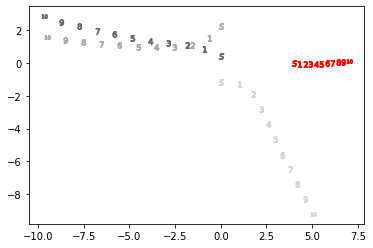

New loop 


Num steps: 180000 Return: -15.2 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7fc7302dbb00>>
180000
181000
182000
183000
184000
185000
186000
187000
188000
189000
New loop 


New loop 


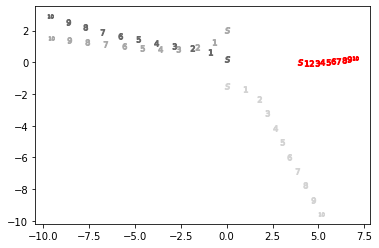

New loop 


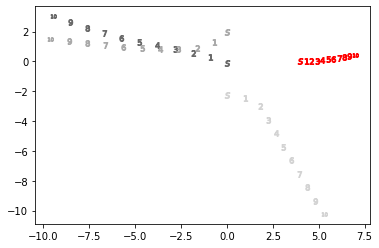

Num steps: 190000 Return: -15.2 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7fc7302dbb00>>
190000
191000
192000
193000
194000
195000
196000
197000
198000
199000
New loop 


New loop 


New loop 


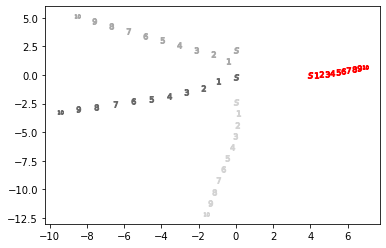

ストリーミング出力は最後の 5000 行に切り捨てられました。
0.5825759087206059
0.6027653397365588
0.7167270288144142
0.9813268805855545
0.8971724773171019
0.6143499536747957
0.5953413406572888
0.8377414796997231
0.9233353738066558
0.7821507120884024
0.927194302759583
0.5068331055322747
0.8225138912051028
0.7205291639994404
0.7239837949778551
0.8142369225855616
0.8448225998794101
0.8340988851153424
0.8775789580514939
0.6968585228351957
0.6415967154756442
0.8547526607250323
0.7149094146935965
0.989585840403224
0.6162007987715123
0.8121451449168424
0.965107842445018
0.7778263131594896
0.6817195897139965
0.5095064197570551
0.58969663907905
0.8926297094146131
0.7908276396286957
0.8405768797911323
0.6275987793547472
0.7011041095828531
0.781721443498814
0.9202733998875328
0.8309382811226901
0.5598172242280975
0.5386651031557607
0.5549229066892989
0.5819812758127985
0.9487757295306157
0.7799972226831519
0.7387755603269978
0.5399007161466055
0.7071983581280566
0.7222628914969415
0.5030157542314553
0.6590599064462306
0.782

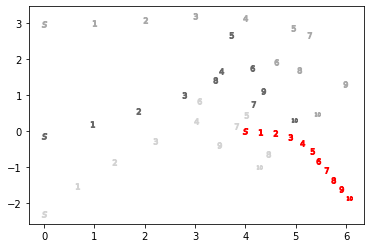

New loop 


New loop 


Num steps: 210000 Return: -7.6  Time: <bound method Trainer.time of <__main__.Trainer object at 0x7fc7302dbb00>>
210000
0.6100697813660907
0.807321936487595
0.8144888777259238
0.6451323937351531
0.653435327925919
0.5119116244929063
0.5355702793691012
0.9946049466697623
0.6599478551691895
0.8626928348654753
0.8095518445212982
0.7337512012498248
0.6119286417770708
0.6525153452019846
0.6248533125167182
0.6611726189570211
0.6754064745023479
0.9504797600857156
0.9599994632217264
0.7443207424989408
0.5140451730825206
0.9422902411590014
0.6256035377880953
0.7842693206169744
0.7078556700190881
0.6334693251944573
0.8884281740137464
0.8783240308023202
0.5518452707482154
0.511809476667427
0.7124790732777144
0.8537069027104243
0.5695319165414037
0.975339575327634
0.7366491093768195
0.5236740158544634
0.820194766723286
0.6318303608756587
0.5061220654498516
0.5218554979373591
0.7178393599641922
0.5318794716027893
0.9486753239247542
0.5624733863351281
0.6452048483234669
0.5137079005416353
0.791391198

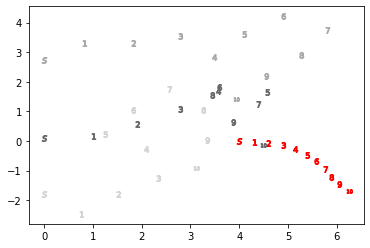

New loop 


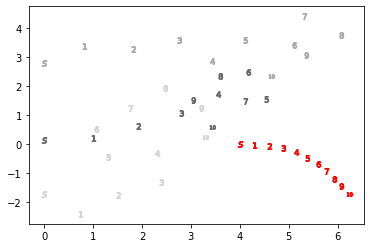

New loop 


ストリーミング出力は最後の 5000 行に切り捨てられました。
0.8724114808224637
0.8742874643197466
0.6383919540814165
0.8251364541720402
0.7097957119346759
0.6171662106457987
0.5300221350019809
0.5338106361235913
0.9650499054359456
0.8454541544503252
0.8616825387696294
0.5427265883200285
0.8955690164387812
0.8377803303296986
0.9697966841108633
0.5598043927923151
0.9288954421504018
0.9954726392459103
0.6382454976781289
0.9967851482973912
0.7989787787005029
0.8498493938306985
0.7972491774282197
0.5677134922100459
0.5314784357123858
0.9286187268662
0.6268630442454689
0.6279713760015856
0.5806266428060685
0.5572002812032021
0.7335062715421485
0.7424810385867026
0.7973044669966721
0.534634068772017
0.9486186080517158
0.7200492404941927
0.5578434363230697
0.8164805056262672
0.6211377457572568
0.5609623645794973
0.8834139826066324
0.7462409049272808
0.565812952325768
0.815874245319687
0.6172564992560498
0.9713147545887715
0.8094630329378895
0.832632372190838
0.5593359638384626
0.7550797236294785
0.8685086298832789
0.5243

New loop 


New loop 


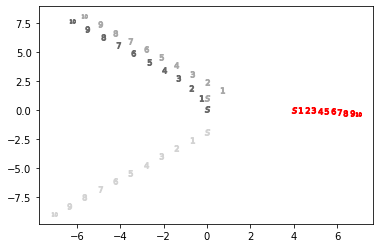

ストリーミング出力は最後の 5000 行に切り捨てられました。
0.9362755891600919
0.5575693890975646
0.953893409177327
0.5737927264450063
0.9782692257540773
0.7055954672392839
0.7481226117565666
0.8260800386177718
0.8268684022386533
0.8105724940912676
0.6565128278833556
0.7380410168660428
0.7087113699747941
0.853698796414719
0.619329854776261
0.7583863153275174
0.5638961501660081
0.6492008974857713
0.95018433153058
0.6276916236421809
0.6529599181225261
0.5808740263008898
0.9036820086101013
0.5485110965498825
0.92504257807759
0.5444692682964931
0.6756693864058034
0.7780270628592232
0.9762483486732069
0.510119931398732
0.5297191319325995
0.7873217470853628
0.8693015145704671
0.9479590824826518
0.8578542466897107
0.512478723203732
0.8470456357535855
0.5812578660130673
0.723344203104922
0.724197676851648
0.5808518016619726
0.5467502943676804
0.9495561724660759
0.7694603713455976
0.7535758068481635
0.8352311748848786
0.7421573195105309
0.7118976977959676
0.5561326779250669
0.6748328158496721
0.9516075100282856
0.94720651

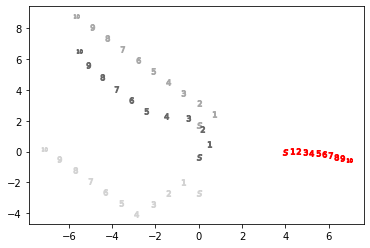

New loop 


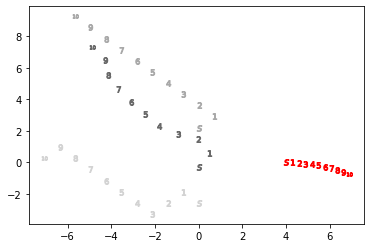

New loop 


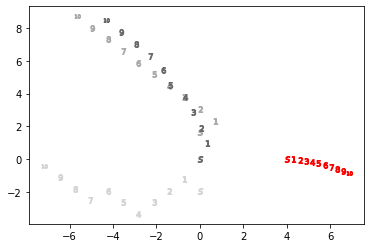

ストリーミング出力は最後の 5000 行に切り捨てられました。
0.7402160767526611
0.5894742029220773
0.8020321013212087
0.5375397330352247
0.5554711074302704
0.7358750856335513
0.9650941309074451
0.600894738210642
0.9290661086980448
0.8300792155093768
0.7502515211488866
0.7085012389602918
0.6390801401759296
0.8623440574370237
0.8449341126456078
0.8898804219549227
0.5436797854469103
0.8037892625079774
0.6439838793477023
0.984420469378755
0.8292011766902073
0.8154779657068083
0.8149653223099805
0.9729624625202277
0.9256921491250915
0.8138140933402549
0.9105485204718421
0.7019690621226045
0.5261981448273026
0.6817549657399063
0.5130306968714223
0.7681524182262951
0.6365805788776072
0.9919820393197581
0.7681010896871099
0.5160793962226314
0.5820450853673592
0.9871070546884755
0.6467129944841199
0.7766454589097361
0.639560852772596
0.6849978035509586
0.902471168747582
0.6115287774376831
0.7078354253354335
0.9714781537239102
0.5060662928193497
0.8304584315699218
0.5681077433154198
0.8262458565664351
0.5622393607281565
0.5

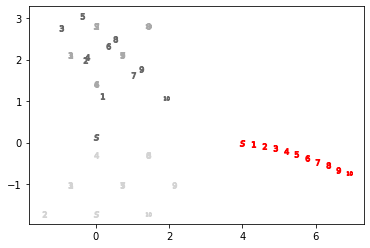

New loop 


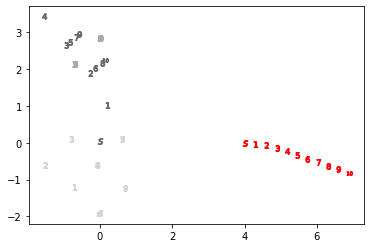

New loop 


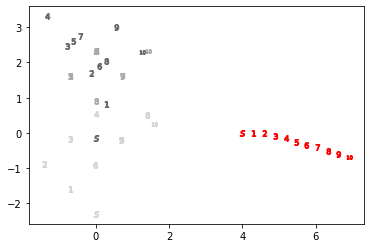

Num steps: 250000 Return: -10.2 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7fc7302dbb00>>
250000
0.9674588424436527
0.9949554300682905
0.7410750388205574
0.9671825840542967
0.9695042831921807
0.8475642595826975
0.7125156892021484
0.9955626283674043
0.6605080281872439
0.8087675991058229
0.5221989433598276
0.816886264068777
0.9400845508667474
0.5068260057934691
0.704094656489245
0.7932006139050579
0.5282482572890719
0.9413063717275955
0.9973227412077359
0.8301370914140515
0.8065950850260178
0.7472201709724527
0.9771572457179658
0.8476697008121374
0.8153939852154647
0.596203262041391
0.9424389238900631
0.9416671588013746
0.5834858577977794
0.5925699812758203
0.5678498674410813
0.9726878060169559
0.9723928349586978
0.503803546392948
0.9333266374618546
0.5417472925216098
0.5467460865685707
0.7999219024740216
0.5999967319515574
0.7466684558969181
0.5462433105784896
0.5163354061844658
0.7461248315698186
0.6881048879246477
0.9402826064746593
0.7822560148479613
0.83126594

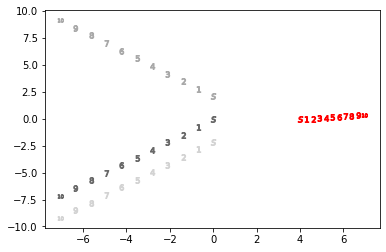

New loop 


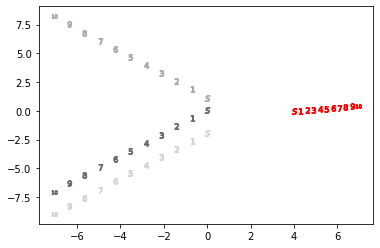

New loop 


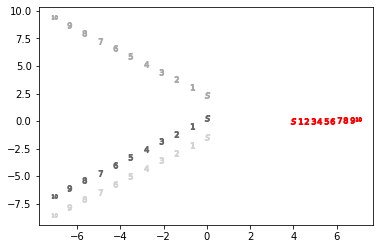

Num steps: 260000 Return: -16.3 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7fc7302dbb00>>
260000
0.6850702411065478
0.6768083477915802
0.8138910667910486
0.7256248024828624
0.869790454795423
0.6314507662487949
0.8439886088455882
0.61770187447555
0.6150171392261368
0.9006219112708985
0.5736545798398612
0.9037240845381886
0.8301937211083443
0.9269833857464327
0.820867396828256
0.5441415556758947
0.91312592176523
0.5758465253339297
0.5834849499440328
0.9099477148251572
0.5414884999291611
0.5442423251195326
0.6696255530714698
0.9464588200702865
0.686286730475567
0.6693600291575844
0.6959541574816955
0.7792219879895633
0.6704226559739429
0.8552477169864445
0.8846126578380309
0.9227072655755507
0.5106835918770868
0.8486944097123148
0.903234635931849
0.613887603590625
0.8883085647666404
0.6308411207606127
0.90139202060767
0.6356659562345882
0.8619009379825098
0.7294391078171593
0.8653459415303348
0.7386231295435816
0.7508315166571803
0.8956507130907937
0.722829254076465

New loop 


New loop 


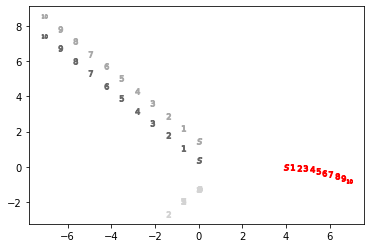

Num steps: 270000 Return: -14.5 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7fc7302dbb00>>
270000
0.6298835099246806
0.5640414908663474
0.6314315471716271
0.9047426336225705
0.9403003185739051
0.8455332332291864
0.9925011768812043
0.9647374445041683
0.7843317190859203
0.7545096946944491
0.7711596535194408
0.5127227630083099
0.6617983319882355
0.677058684411034
0.8386595498630592
0.7442616211762602
0.7377171954486965
0.5524427347581572
0.7187877710134358
0.6542310209478893
0.6446499914492859
0.6413261284789525
0.5910952315144103
0.7475383785014893
0.6500370086500263
0.8548239687259376
0.68846137723941
0.8415863369842168
0.5049000948940101
0.8107102668368197
0.6241246681052198
0.7732072235703079
0.8050761665732658
0.6620246452322072
0.9320146588345368
0.5579718876610626
0.7701732979481903
0.8758488695037224
0.6043437830690259
0.9480043155578226
0.5913554146512138
0.6709437289418619
0.8238371162753765
0.950118217147453
0.5069209011064495
0.6306264999747393
0.91696041

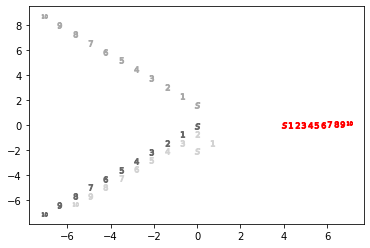

New loop 


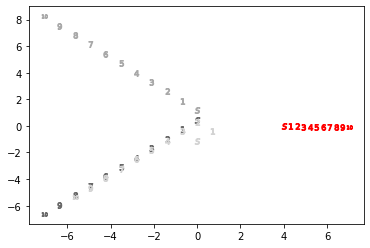

New loop 


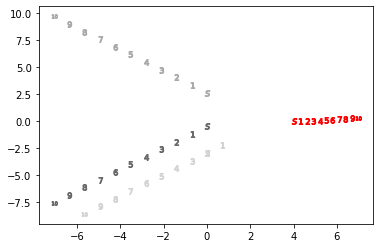

ストリーミング出力は最後の 5000 行に切り捨てられました。
0.6455336371684256
0.973140410163362
0.6031841260067945
0.6979852880907514
0.7272849865180675
0.9105359926575848
0.5695985495798569
0.9948359530353301
0.581250767290506
0.7630834457016915
0.5841036471193987
0.927361434798057
0.6344794476360162
0.7501521247630436
0.5728311817199598
0.5657794923378272
0.827804449623059
0.9300752143358536
0.5731857902695117
0.9538148238193392
0.9593433580856278
0.6352721091213251
0.5750119355913683
0.9182250662604997
0.8038185508172462
0.9297119034743536
0.6260614373782462
0.6919629603658896
0.5645519412837069
0.891048143764449
0.9966160579306915
0.7891967249293361
0.6819181404116109
0.7903779796143574
0.7359710499090223
0.8246592076750328
0.6421996545944805
0.6511236175334086
0.5360587303895604
0.7652977502162607
0.9928600390131939
0.9633702279455624
0.5397773839014488
0.6319720905404131
0.6725363836622867
0.6160529834945062
0.5394156481593578
0.8874297042875984
0.5285492778919214
0.5948975356011936
0.6625472443310461
0.99

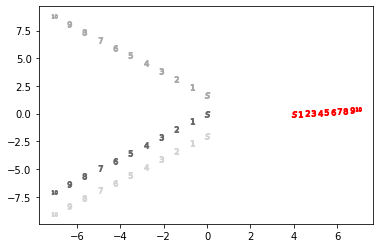

New loop 


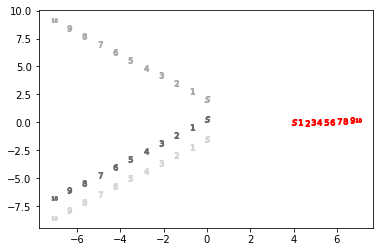

New loop 


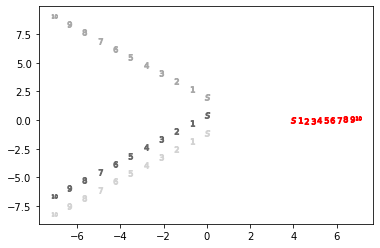

ストリーミング出力は最後の 5000 行に切り捨てられました。
0.8025413913799406
0.6181623688177086
0.967999335190246
0.5332673435035993
0.7209385450093814
0.9317399982209972
0.6210855110381251
0.5860074578039557
0.9919913783965026
0.9541364195000281
0.5479700496109604
0.6144792497162515
0.947125035642599
0.9695958337100501
0.7398732632851036
0.7358382531180112
0.8044644457403174
0.7606093000625195
0.7752738636034796
0.6570758765510065
0.6495002306197074
0.8749056437930458
0.5550556369166165
0.9076221324879249
0.9495930469435135
0.776994704545363
0.747950793475159
0.6701765745414494
0.5580989350066253
0.6600446053768819
0.767373187927797
0.9406408573221484
0.7765816641869806
0.5022030434633893
0.6365056455773115
0.9963509379212038
0.6691612677628296
0.7385900206081926
0.6696750004935211
0.7684993362787367
0.7401469643726368
0.5045317971870829
0.9901818471850798
0.9195957276399553
0.5567789015570048
0.5358867744187067
0.5626563993497674
0.9253353179155396
0.5935520409517139
0.9362018247816792
0.9151115491263418
0.79

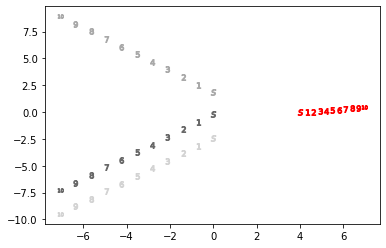

New loop 


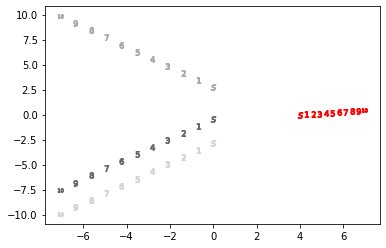

New loop 


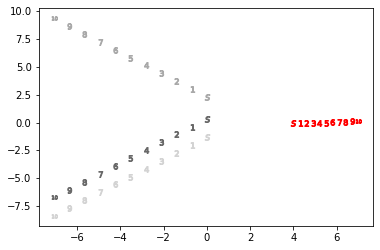

ストリーミング出力は最後の 5000 行に切り捨てられました。
0.7362856541489654
0.8266657011939901
0.9195799413649925
0.5624557248374662
0.9915411602699379
0.8033239808802208
0.5369674261977
0.9630087547839266
0.5145067832888871
0.7696828819072861
0.8553433882956936
0.6388183309613423
0.6491562024477704
0.9201777265362047
0.7003316648583018
0.9620792985515778
0.7599612998657355
0.8681788593906549
0.9322366316105
0.5888997879287614
0.633811534730749
0.9015580145689029
0.5499889025041024
0.6003289908165099
0.691899758886627
0.841920460449501
0.6129233176866107
0.9935261215423892
0.6853655651458906
0.6508897079849355
0.5896033886978866
0.6354996901162426
0.8279845852124327
0.6495655409620295
0.5616316479559388
0.5919850764887902
0.7107719979088175
0.9539631912644254
0.7973089374632228
0.9907840134313867
0.5699057405904033
0.9693354154749978
0.9972879162747397
0.6813207503106035
0.7520454698672313
0.5150226712579595
0.962848131086605
0.8224142544338597
0.5492601022175616
0.5595284146187931
0.896643602139864
0.95826500

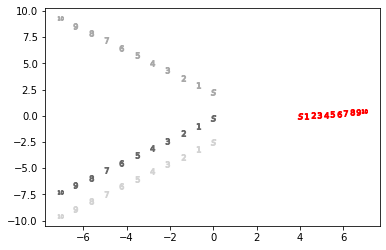

New loop 


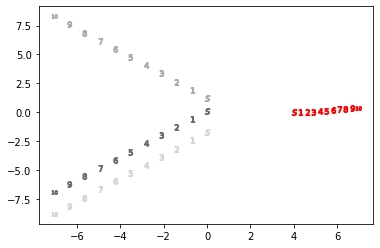

New loop 


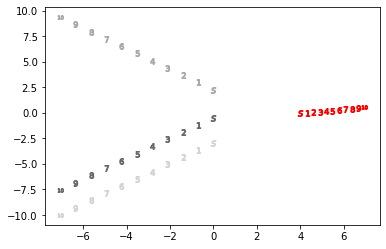

ストリーミング出力は最後の 5000 行に切り捨てられました。
0.652246259572184
0.5954271460291432
0.9471996694833605
0.6975472829284862
0.6644801741914862
0.7737617213387074
0.5795597254387618
0.6871235956715311
0.6890450401961191
0.5421174782644516
0.7747199418322852
0.9238205933419762
0.7012984942710749
0.5924468295182556
0.5433581707644224
0.6852438714070725
0.9700727798329396
0.9060802187842376
0.738850500891515
0.783040041004819
0.6372383926117012
0.8789795754564782
0.6126983382915161
0.723702148678154
0.6904828073859111
0.7505800747517818
0.9977746173588807
0.5794207018280345
0.9382680437175426
0.5126818166225944
0.962663856317461
0.8251210575255105
0.9518543063915405
0.9668289305587224
0.7920863637961989
0.9968343811997179
0.9711512454330773
0.5969245161500759
0.7101462853392607
0.8815671831974138
0.6045485707927295
0.8710606489962128
0.9353312905984345
0.9756901436867291
0.663347931815675
0.6739150773481004
0.9292091859385678
0.9359836888286601
0.9156778823207081
0.7740238962574073
0.8731842954008187
0.802

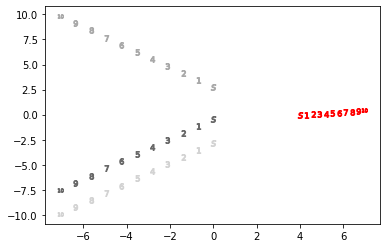

New loop 


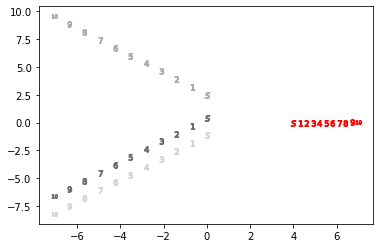

New loop 


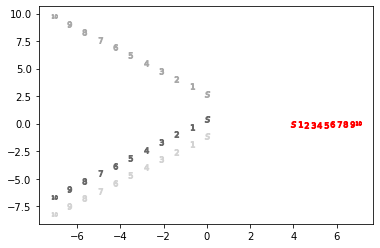

ストリーミング出力は最後の 5000 行に切り捨てられました。
0.7613825714208473
0.812503481941707
0.8805587963717295
0.7261995544692246
0.9158028302443356
0.809093549431473
0.9902063210045752
0.6889108793253429
0.9019672455602514
0.8370539499137111
0.6923906465986044
0.6292858615635712
0.5220469034797237
0.9854625804312588
0.5206821090999456
0.7114110615306886
0.7890120180424164
0.6775764840792131
0.6702276657599552
0.6612783588514899
0.9259922744761243
0.6465848348804389
0.806665921948491
0.7460258537447207
0.8714323932325542
0.631314762263261
0.780588387574733
0.9700788331499054
0.995616065426862
0.7172565847440675
0.7759753698442896
0.6206645446890838
0.6514316458062576
0.7013929308540533
0.8065961727106025
0.6119439730521792
0.6349283322642646
0.8444704784699218
0.6128070379870094
0.8299074702379107
0.6928988038338262
0.8221815262992417
0.5690255723955907
0.6148121696938362
0.5545379178309492
0.5976456650140265
0.6691077828492958
0.7946425272729639
0.5570360308265425
0.7224435375100132
0.9459844869815319
0.675

New loop 


New loop 


ストリーミング出力は最後の 5000 行に切り捨てられました。
0.8800438405775783
0.6636466224493893
0.9252471056445611
0.9694037374697304
0.7748285185537255
0.7367605064025112
0.9891085174105714
0.6325965190493681
0.6179339995795944
0.5439552374120092
0.5036761778340307
0.7500938499710647
0.5587952968797948
0.5836258421232433
0.9321574021028307
0.602035801971048
0.9881435130772367
0.8721509991484367
0.5435870197298771
0.946272106086965
0.5938516138145402
0.5089903481707511
0.7671909321024066
0.974820716028877
0.7517858726983134
0.7219197354995908
0.5369358353449043
0.6300740610519066
0.9927437524664611
0.738369764604061
0.8285378973794477
0.608369354272772
0.8121971463800635
0.6599011896616681
0.7831734729966434
0.666777324964655
0.7793368399009561
0.6425097931534482
0.653011549985178
0.8125909982428495
0.8264217078725318
0.7041842380166046
0.5384178965118889
0.5094419355828663
0.7416226709701059
0.8628394841139934
0.7139307807819064
0.592313632940871
0.6930817462476956
0.5237646153616053
0.5424280991877194
0.56673

New loop 


New loop 


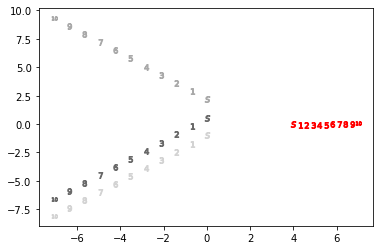

ストリーミング出力は最後の 5000 行に切り捨てられました。
0.9320776978245033
0.8584881286810253
0.5741696431073977
0.8045291220112786
0.517750340673184
0.9843846621720908
0.6536505141862429
0.9449074766702565
0.7407961675893887
0.6602600766689309
0.7861612228431715
0.5205606592587306
0.994957446820481
0.8450246484863563
0.993628329622061
0.6257671472787139
0.6287874099911505
0.9179091776023177
0.6186270680393657
0.5091563050323789
0.6207923155424382
0.5673681164972555
0.8635855570804856
0.5048189105292016
0.7609668114994232
0.8993136185216482
0.8722102531716197
0.8289002675095021
0.6198914514732151
0.586259303299072
0.6686326753953329
0.9534346858842974
0.8836708329457729
0.6884314226680942
0.7964913408717524
0.7811898197804731
0.7773990090997671
0.6380652818346824
0.6226758217605336
0.7789838971963906
0.7049166093372359
0.8197303886141944
0.5693867714405219
0.8904552344730163
0.6545164866925619
0.8082607472794704
0.7439694017019969
0.6877929676597287
0.780083841062567
0.9771333528725548
0.5153848623432309
0.73

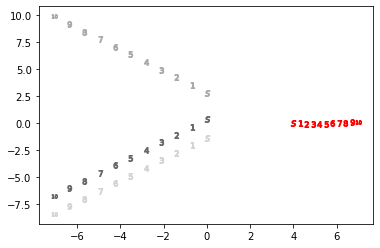

New loop 


New loop 


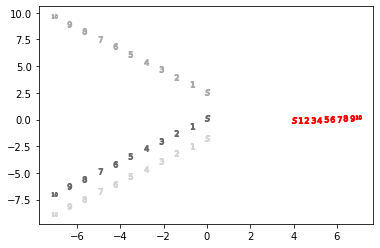

ストリーミング出力は最後の 5000 行に切り捨てられました。
0.5963723173403038
0.777083403104358
0.5786224971289169
0.5930892880563482
0.8354878575041407
0.5164854776830039
0.958839201561858
0.8160001908853689
0.6671716321759738
0.8974366636093951
0.8582541979635558
0.5699504643177632
0.5648020249232688
0.5752316976699898
0.5546068063935161
0.753347958481761
0.9178320381442441
0.8463063637304323
0.6370109408321689
0.9902623051851349
0.777779712527778
0.6667813910739308
0.9169041745342814
0.5527192847628989
0.9815584627843233
0.8538574208865941
0.7711631653393851
0.9517809028318458
0.6599254618918442
0.6870060572158082
0.8751153970657134
0.5427579686450287
0.8272878515186826
0.9174437622083389
0.7367904691194437
0.8288359138563138
0.5786246695765048
0.8991580362901692
0.6861153197843745
0.6640300508004758
0.5331889485469526
0.6947219562233179
0.7805209000554914
0.52147191796391
0.5227090823012787
0.5146596264645216
0.9636020252424987
0.8055950214572543
0.7525996433866822
0.8216071836669934
0.8692671555923083
0.630

New loop 


New loop 


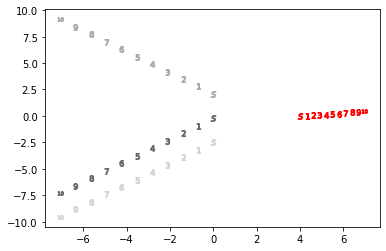

ストリーミング出力は最後の 5000 行に切り捨てられました。
0.931992367828206
0.8252508826745936
0.9899604694205932
0.9901598515415049
0.8644258273026841
0.8093560208867241
0.7378901665342186
0.6602869210917262
0.9975384471820172
0.8813199651552632
0.7760031166033191
0.8286486631812291
0.669762340932143
0.8842959121347764
0.9304809326713731
0.7705125711686758
0.5794882440344603
0.5906910480286088
0.5145355604881432
0.5386973431393123
0.9460266696146289
0.6400479531834817
0.6962206500394877
0.9923799821531962
0.856969741145398
0.8553268098040151
0.6451394637496425
0.9486224925856047
0.8979303051183102
0.9499007915384292
0.9195767923526804
0.8024732916019335
0.5214327079546663
0.8119162506679171
0.9067348228030649
0.5104513753620935
0.628287823705787
0.954796466840394
0.6031359306205754
0.7215708514999927
0.9051472719153724
0.5880650703751483
0.5665001944161694
0.9839739049030773
0.6749916287903405
0.5380919173789296
0.8845369014538118
0.9361594137782597
0.5471692844007451
0.7185878184323607
0.5439771020157566
0.54

New loop 


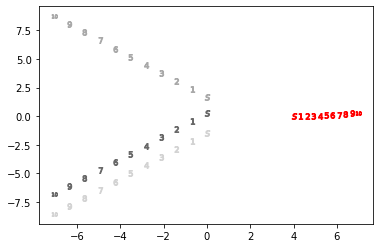

New loop 


Num steps: 370000 Return: -16.3 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7fc7302dbb00>>
370000
0.9774387713393538
0.5411056800467187
0.5087645551212908
0.7373222176907873
0.9094007162088285
0.9069792484657877
0.5480434258019768
0.9679365697079217
0.9441104336815996
0.6453306244578286
0.991805130025329
0.8490159228065547
0.5587263488855557
0.7039797802450065
0.8827241064713799
0.8293532335151114
0.5117642925699605
0.5135702248122165
0.5183489115831769
0.6829589708629757
0.5137023001403911
0.5000734044526779
0.7054237135444469
0.656848055426168
0.6208173952295523
0.9850082585444563
0.8300718111106754
0.8229490312068773
0.8560453277411983
0.5948732021129941
0.6982189740214622
0.6689549367850866
0.9420946584293693
0.6684440766158842
0.7090114364257042
0.5706015492143379
0.9584055790854007
0.8389092318060589
0.9955783864471409
0.6713004189468089
0.9211443702821699
0.6004764045807194
0.6961345576723632
0.9201214990270644
0.7220072677493186
0.803165685205659
0.6667335

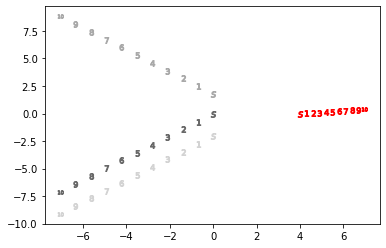

New loop 


New loop 


Num steps: 380000 Return: -16.3 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7fc7302dbb00>>
380000
0.7663780315890876
0.7228422929006376
0.7110455435757133
0.7840493707850504
0.8936893309732046
0.6731704722099623
0.7421177102472531
0.9937147080719947
0.5803574298100277
0.6625474697756261
0.7767182662112367
0.5238311208505776
0.671907295849555
0.8500819778914729
0.9628684941058777
0.5314150629476807
0.8443358661423432
0.6591278279893227
0.7829505420624951
0.8115591247188004
0.5251894961074987
0.8426962435573537
0.7946163051385214
0.7373210744344375
0.9627889273460059
0.7143413428989035
0.6965369364521492
0.5281453966458203
0.7300634006105927
0.6155995153641537
0.9061663970100546
0.8977183049503829
0.884444082070819
0.5890534559792814
0.7236580252305564
0.6481464336794162
0.8133605957992194
0.5641554840926875
0.8060755410199004
0.7474087570192579
0.9681539242856785
0.7627396042918166
0.6549214028670995
0.9453952865895261
0.5095320381535402
0.7715343612266451
0.523298

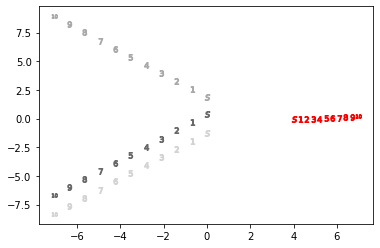

New loop 


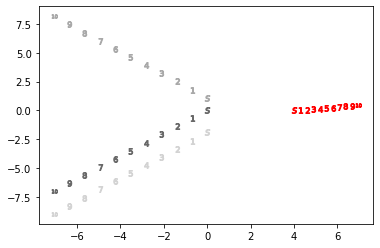

New loop 


ストリーミング出力は最後の 5000 行に切り捨てられました。
0.8331713580230906
0.6867586208350861
0.8070567813659638
0.6242162666164608
0.565571487266061
0.8968432575409613
0.6503541904321655
0.5409091326462772
0.538057909643297
0.768124550192249
0.7766578950110993
0.6731772694252387
0.6739263041376091
0.6411266968436797
0.6968858494402239
0.7791822284443968
0.7478462569604423
0.7969160547294712
0.7899428661399975
0.9631282190067478
0.62670875565833
0.8802138708687999
0.8902451372350332
0.7389277609625718
0.9939898817672626
0.5759712054062847
0.9730117224451177
0.6033991905142578
0.6121578399662826
0.5965225245495396
0.5513271467540253
0.9855239178362404
0.6784954452277265
0.9107096492985277
0.7473746816642811
0.5116641519566707
0.8737289166368631
0.5481768068101895
0.7041970151925937
0.662725070064419
0.5475812640731654
0.7357448645132822
0.5694016631644936
0.7444996957026323
0.6215430347144619
0.5906669329197772
0.5702361932984856
0.6477494060057694
0.501212147416022
0.6254761361294294
0.5140552360893672
0.5035

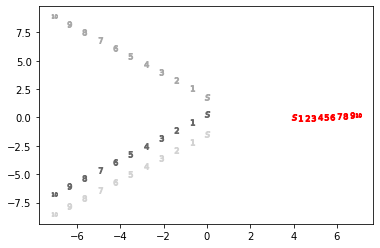

New loop 


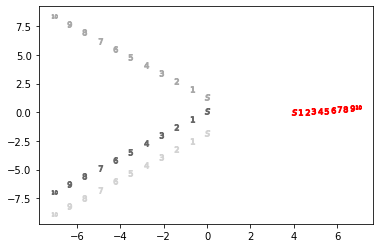

New loop 


Num steps: 400000 Return: -16.2 Time: <bound method Trainer.time of <__main__.Trainer object at 0x7fc7302dbb00>>
400000


In [ ]:
trainer.train()

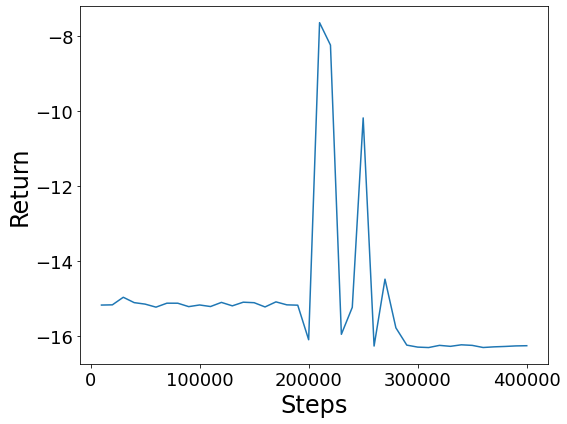

In [ ]:
trainer.plot()

In [ ]:
height_random = np.random.randn() * 2 - 1
width_extent = 0.7
state = np.array([width_extent, height_random])
environment = np.array([2, 2])
state = state * environment
print(state)

[ 1.4        -2.74400282]


In [ ]:
np.random.rand() * 2 - 1

-0.5591179276235387